<h2>1. Perkenalan</h2>
<hr>

<h2>Final Projek 3</h2>
<hr>

Authors dan Creators:

1. Alvaro Jonathan Nehemia
2. Tio Alfian Zahri
3. Erwin Hariadi

<h2>Instruksi</h2>
<hr>

Isi notebook harus mengikuti <b>outline</b> seperti di bawah:

1. Perkenalan
2. Import Pustaka
3. Data Loading
4. Data cleaning
5. Explorasi Data
6. Data Preprocessing
7. Pendefinisian Model
8. Pelatihan Model
9. Evaluasi Model
10. Model Inference
11. Pengambilan Kesimpulan

<h2>Projek Rubrik</h2>
<hr>

1. Mengimplementasikan model klasifikasi machine learning dengan Sklearn
2. Preprocessing data sebelum melakukan pengolahan lebih lanjut
3. Kode berjalan tanpa error
4. Tertata dengan baik (markdown) setiap kode
5. Analisis algoritma yang digunakan

<h2>Dataset (Heart Failure Prediction)</h2>
<hr>

Dataset yang digunakan adalah

<b>Heart Failure Prediction</b>

Link: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data.

<h4>Deskripsi Atribut</h4>

1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up



<h3>Objektif yang ingin dicapai</h3>
<hr>

Final Project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:
1. Mampu memahami konsep Classification dengan Ensemble Model
2. Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
3. Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

<h2>2. Import libraries</h2>
<hr>

In [1]:
# Library untuk analisis data
import pandas as pd
import numpy as np

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk machine learning dan pemodelan
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from scipy import stats
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

# lainnya
import warnings
warnings.filterwarnings("ignore")

<h2>3. Data Loading</h2>
<hr>

In [2]:
# Missing Values format
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN',' ',' - ']

# membaca dataset
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv', na_values=missing_values)

# menampilkan tampilan kolom full
pd.set_option('display.max_columns', 500)

# menampilkan dataset
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
#Dimensi dataset
print("Dimensi dari dataset:\n", df.shape)
print("")
# Atribut pada dataset
print("Atribut pada dataset:\n", df.columns.values)
print("")
# Informasi pada dataset
print("Informasi pada dataset:")
print(df.info())

Dimensi dari dataset:
 (299, 13)

Atribut pada dataset:
 ['age' 'anaemia' 'creatinine_phosphokinase' 'diabetes' 'ejection_fraction'
 'high_blood_pressure' 'platelets' 'serum_creatinine' 'serum_sodium' 'sex'
 'smoking' 'time' 'DEATH_EVENT']

Informasi pada dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                 

<h2>4. Data Cleaning</h2>
<hr>

In [4]:
# mengubah nama kolom menjadi lowercase semua
df.rename(columns = {'DEATH_EVENT' : 'death_event'}, inplace = True)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
# mengecek missing values pada masing-masing kolom
df.isna().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
death_event                 False
dtype: bool

In [ ]:
# menampilkan jumlah missing value pada masing-masing kolom
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

In [ ]:
# melihat informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
# mengecek data duplikat
df.duplicated().sum()

0

In [ ]:
# menampilkan dataset
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<h2>5. Explorasi Data</h2>
<hr>

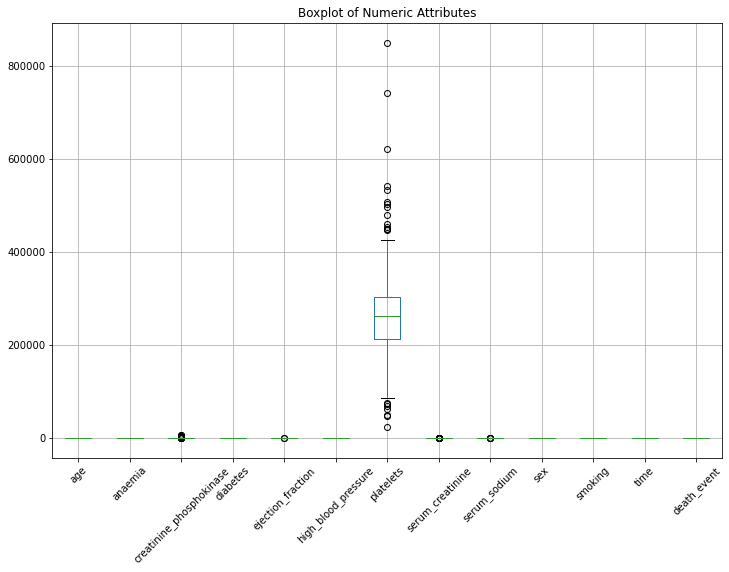

In [ ]:
# menampilkan outlier menggunakan boxplot

plt.figure(figsize=(12, 8))
df.boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Attributes')
plt.show()

In [ ]:
# mengganti nilai outlier dengan median
for column in df:
    # menghitung z-score untuk kolom saat ini
    z_scores = np.abs(stats.zscore(df[column]))

    # menentukan threshold z-score untuk outlier (misalnya, jika z-score > 3)
    threshold = 3

    # mengidentifikasi baris yang merupakan outlier berdasarkan z-score
    outliers = df[z_scores > threshold]

    # menggantikan outlier dengan nilai yang masuk akal
    replacement_value = df[column].mean()  # Menggunakan median sebagai nilai pengganti
    df.loc[z_scores > threshold, column] = replacement_value

# menampilkan bentuk dataset setelah mengganti outlier
print("Shape: ", df.shape)

Shape:  (299, 13)


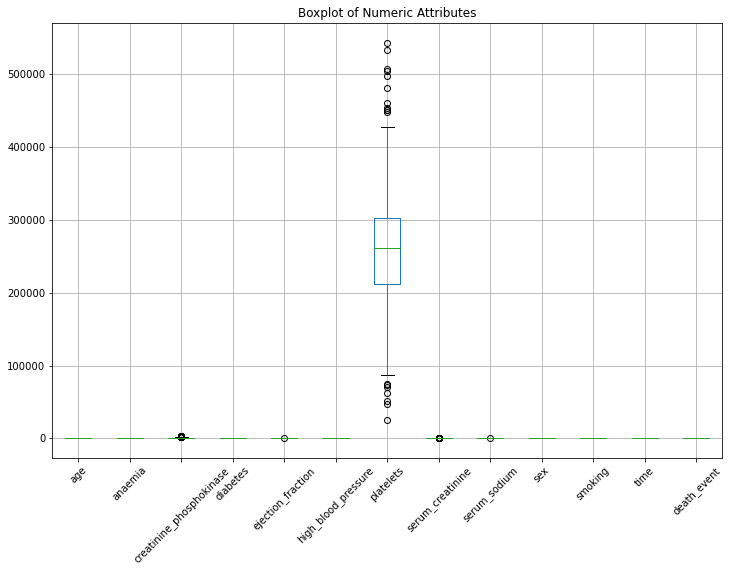

In [ ]:
# menampilkan outlier menggunakan boxplot

plt.figure(figsize=(12, 8))
df.boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Attributes')
plt.show()

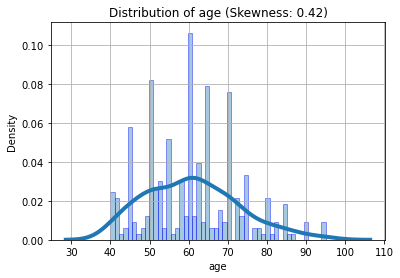

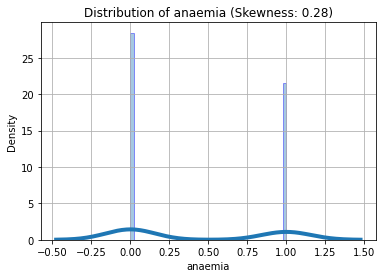

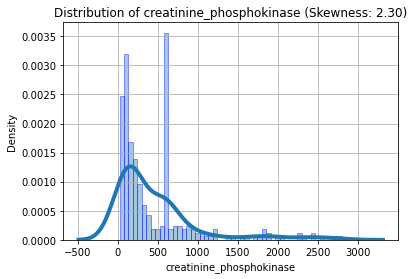

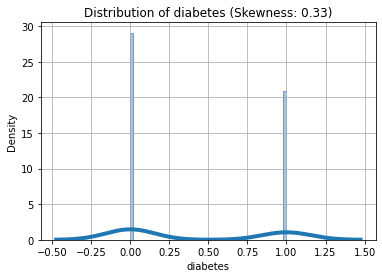

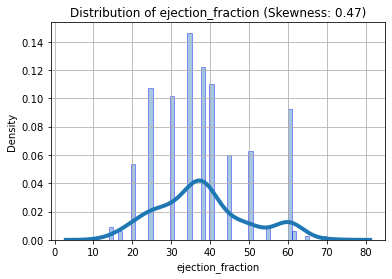

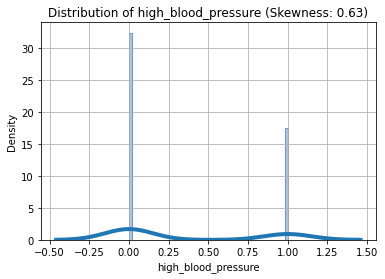

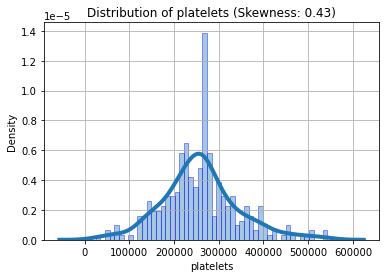

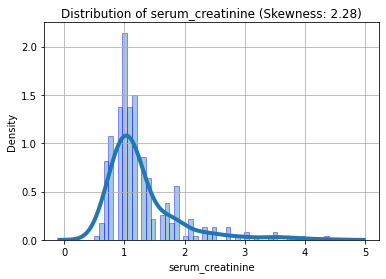

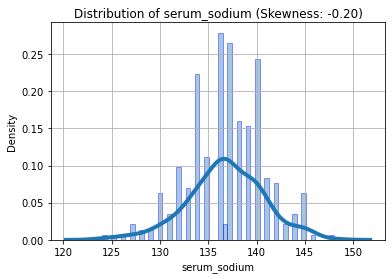

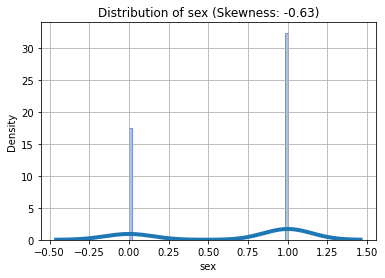

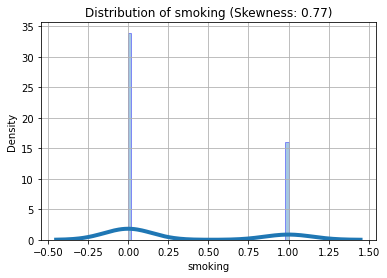

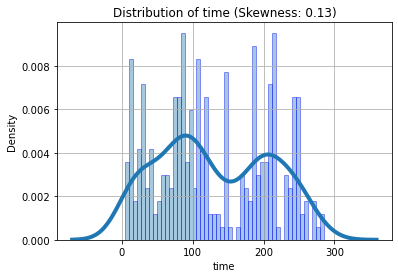

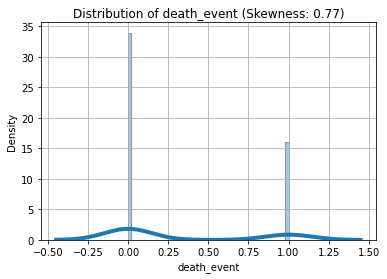

In [ ]:
# Mengecek skewness menggunakan histogram untuk setiap atribut
for column in df:
    skewness = df[column].skew()
    plt.figure(figsize=(6, 4))
    sns.distplot(df[column], bins=50, hist=True, kde=True, rug=False,
                 hist_kws={'edgecolor': 'blue'}, kde_kws={'linewidth': 4})
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title('Distribution of {} (Skewness: {:.2f})'.format(column, skewness))
    plt.grid(True)
    plt.show()

In [ ]:
# Mengecek skewness
skewness = df.skew()
print("Skewness:")
print(skewness)

Skewness:
age                         0.423062
anaemia                     0.278261
creatinine_phosphokinase    2.296319
diabetes                    0.333929
ejection_fraction           0.468949
high_blood_pressure         0.626732
platelets                   0.433836
serum_creatinine            2.277536
serum_sodium               -0.204239
sex                        -0.626732
smoking                     0.770349
time                        0.127803
death_event                 0.770349
dtype: float64


In [ ]:
# Melakukan transformasi logaritma pada fitur dengan skewness tinggi
skewed_features = ['creatinine_phosphokinase', 'serum_creatinine']
df_skewed = df[skewed_features].copy()

# Menggunakan logaritma natural (np.log1p) untuk transformasi
df_skewed_transformed = np.log1p(df_skewed)

# Menyimpan hasil transformasi pada dataframe
df[skewed_features] = df_skewed_transformed
print("done")

done


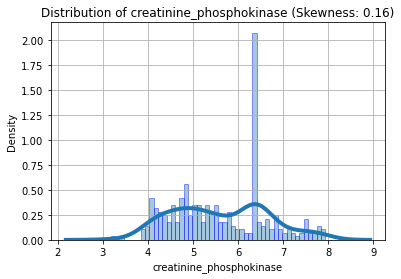

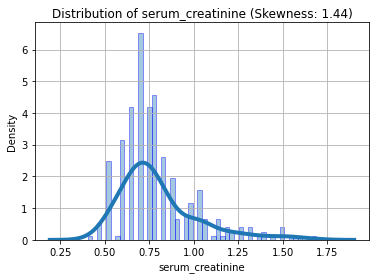

In [ ]:
# Mengecek skewness menggunakan histogram untuk setiap atribut yang sudah di transformasi
for column in skewed_features:
    skewness = df[column].skew()
    plt.figure(figsize=(6, 4))
    sns.distplot(df[column], bins=50, hist=True, kde=True, rug=False,
                 hist_kws={'edgecolor': 'blue'}, kde_kws={'linewidth': 4})
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title('Distribution of {} (Skewness: {:.2f})'.format(column, skewness))
    plt.grid(True)
    plt.show()

In [ ]:
# Mengecek skewness
skewness = df.skew()
print("Skewness:")
print(skewness)

Skewness:
age                         0.423062
anaemia                     0.278261
creatinine_phosphokinase    0.159789
diabetes                    0.333929
ejection_fraction           0.468949
high_blood_pressure         0.626732
platelets                   0.433836
serum_creatinine            1.441408
serum_sodium               -0.204239
sex                        -0.626732
smoking                     0.770349
time                        0.127803
death_event                 0.770349
dtype: float64


In [ ]:
# Melakukan transformasi akar kuadrat pada atribut "serum_creatinine"
df['serum_creatinine'] = np.sqrt(df['serum_creatinine'])

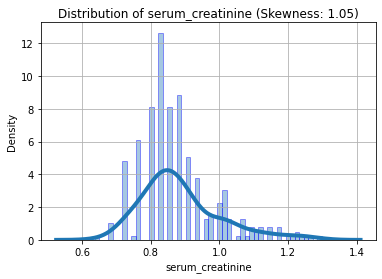

In [ ]:
# Mengecek skewness dan membuat histogram untuk skew yang sudah di transformasi
skewness = df['serum_creatinine'].skew()
plt.figure(figsize=(6, 4))
sns.distplot(df[column], bins=50, hist=True, kde=True, rug=False,
    hist_kws={'edgecolor': 'blue'}, kde_kws={'linewidth': 4})
plt.xlabel(column)
plt.ylabel('Density')
plt.title('Distribution of {} (Skewness: {:.2f})'.format(column, skewness))
plt.grid(True)
plt.show()

In [ ]:
# Mengecek skewness
skewness = df.skew()
print("Skewness:")
print(skewness)

Skewness:
age                         0.423062
anaemia                     0.278261
creatinine_phosphokinase    0.159789
diabetes                    0.333929
ejection_fraction           0.468949
high_blood_pressure         0.626732
platelets                   0.433836
serum_creatinine            1.047893
serum_sodium               -0.204239
sex                        -0.626732
smoking                     0.770349
time                        0.127803
death_event                 0.770349
dtype: float64


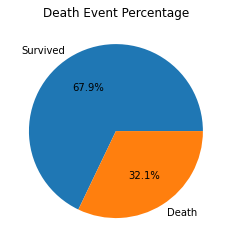

In [ ]:
# Menghitung jumlah death event
death_counts = df['death_event'].value_counts()

# Membuat pie chart
labels = ['Survived', 'Death']
plt.pie(death_counts, labels=labels, autopct='%1.1f%%')
plt.title('Death Event Percentage')
plt.show()

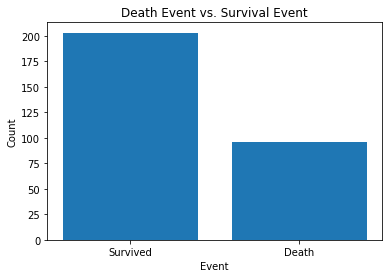

In [ ]:
# Menghitung jumlah death event dan survival event
event_counts = df['death_event'].value_counts()

# Membuat bar chart
plt.bar(['Survived', 'Death'], event_counts)
plt.xlabel('Event')
plt.ylabel('Count')
plt.title('Death Event vs. Survival Event')
plt.show()

<h2>6. Data Preprocessing</h2>
<hr>

In [ ]:
# menampilkan statistik deskriptif dari kolom-kolom numerik pada dataset
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,5.613699,0.418060,37.943423,0.351171,258599.079725,0.885195,136.825673,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,1.040052,0.494067,11.582220,0.478136,84794.321576,0.116946,3.912780,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,3.178054,0.000000,14.000000,0.000000,25100.000000,0.636761,124.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,4.766357,0.000000,30.000000,0.000000,212500.000000,0.801158,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,5.525453,0.000000,38.000000,0.000000,262000.000000,0.861358,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,6.368187,1.000000,45.000000,1.000000,302000.000000,0.934982,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7.935587,1.000000,70.000000,1.000000,543000.000000,1.298614,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
# buat variabel x berisi semua kolom-kolom yang ada kecuali kolom death_event
x = df.drop(columns = 'death_event')

# buat variabel y berisi kolom death_event
y = df['death_event']

In [ ]:
# Inisialisasi RandomUnderSampler
undersampler = RandomUnderSampler()

# Terapkan Random Undersampling pada data
x_resampled, y_resampled = undersampler.fit_resample(x, y)

In [ ]:
# membuat data latih dan data uji dengan indikasi 30% ke data uji 70% ke data latih
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

<h2>7. Pendefinisian Model</h2>
<hr>

<h3>Model yang Berbasiskan Algoritma Ensemble</h3>

In [ ]:
# Inisialisasi dan latih model RandomForestClassifier
rfc = RandomForestClassifier()

# Inisialisasi dan latih model AdaBoostClassifier
abc = AdaBoostClassifier()

**Random Forest:**

Random Forest adalah sebuah algoritma ensemble yang menggabungkan beberapa "Decision Tree" secara acak. Setiap "Decision Tree" dibangun dengan menggunakan sampel acak dari data pelatihan (bootstrap) dan pemilihan acak dari fitur. Ini membantu mengurangi overfitting dan meningkatkan generalisasi model. Keuntungan utama adalah kemampuannya dalam mengukur pentingnya fitur (feature importance).

**AdaBoost (Adaptive Boosting):**

AdaBoost adalah algoritma ensemble yang berfokus pada model "Decision Tree" (biasanya "Decision Tree" yang mudah) dan memberikan bobot lebih besar pada sampel yang salah diklasifikasikan oleh model sebelumnya. Dengan cara ini, itu mengatasi data yang sulit dengan meningkatkan akurasi model secara adaptif. Ini tidak memerlukan tuning parameter yang kompleks dan mengurangi bias serta varian model.

<h3>Model yang Berbasiskan Ensemble dari Beberapa Algoritma Individual</h3>

In [ ]:
# Inisialisasi model-model yang akan digunakan dalam Voting Classifier
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC()

# Inisialisasi Voting Classifier
vc = VotingClassifier(estimators=[('clf1', lr), ('clf2', dt), ('clf3', svm)], voting='hard')

<h2>8. Pelatihan Model</h2>
<hr>

In [ ]:
# Latih model Random Forest
rfc.fit(x_train, y_train)

# Latih model AdaBoost
abc.fit(x_train, y_train)

# Latih model Voting Classifier
vc.fit(x_train, y_train)

# Lakukan prediksi pada data uji menggunakan model Random Forest
y_test_rfc = rfc.predict(x_test)

# Lakukan prediksi pada data uji menggunakan model AdaBoost
y_test_abc = abc.predict(x_test)

# Lakukan prediksi pada data uji menggunakan model Voting Classifier
y_test_vc = vc.predict(x_test)

<h2>9. Evaluasi Model</h2>
<hr>

In [ ]:
print('Metrics untuk Model Random Forest adalah : ')
print(classification_report(y_test, y_test_rfc))

Metrics untuk Model Random Forest adalah : 
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93        62
         1.0       0.91      0.75      0.82        28

    accuracy                           0.90        90
   macro avg       0.90      0.86      0.88        90
weighted avg       0.90      0.90      0.90        90



In [ ]:
print('Metrics untuk Model AdaBoost adalah : ')
print(classification_report(y_test, y_test_abc))

Metrics untuk Model AdaBoost adalah : 
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87        62
         1.0       0.76      0.57      0.65        28

    accuracy                           0.81        90
   macro avg       0.79      0.75      0.76        90
weighted avg       0.81      0.81      0.80        90



In [ ]:
print('Metrics untuk Model Voting Classifier adalah : ')
print(classification_report(y_test, y_test_vc))

Metrics untuk Model Voting Classifier adalah : 
              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86        62
         1.0       0.80      0.43      0.56        28

    accuracy                           0.79        90
   macro avg       0.79      0.69      0.71        90
weighted avg       0.79      0.79      0.77        90



<h2>10. Model Inference</h2>
<hr>

In [ ]:
# mencoba dengan data random
data = pd.DataFrame({'age':[30, 20, 50, 30, 40],
                    'anaemia':[1, 1, 0, 1, 0],
                    'creatinine_phosphokinase':[300, 500, 200, 300, 300],
                    'diabetes':[1, 0, 1, 1, 0],
                    'ejection_fraction':[10, 30, 30, 20, 10],
                    'high_blood_pressure':[0, 0, 1, 1, 0],
                    'platelets':[200000, 300000, 500000, 300000, 400000],
                    'serum_creatinine':[1, 2, 2, 3, 1],
                    'serum_sodium':[200, 200, 300, 100, 400],
                    'sex' :[1, 1, 0, 0, 1],
                    'smoking':[1, 1, 0, 1, 1],
                    'time':[10, 20, 20, 30, 40]
})

# Prediksi
y_pred = vc.predict(data)

# Hasil Prediksi
print('Hasil Prediksi : ')
print(y_pred)

Hasil Prediksi : 
[1. 0. 0. 1. 1.]


<h2>11. Kesimpulan</h2>
<hr>

1. Dataset yang digunakan dalam proyek ini adalah "Heart Failure Prediction" yang berisi tentang 13 atribut yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. Dataset ini terdiri dari 299 baris dan 13 kolom dan tidak memiliki missing value serta duplicate value

2. Berikut ini adalah data hasil pengecekan skewness:
- Skewness:
- age                         0.423062
- anaemia                     0.278261
- creatinine_phosphokinase    2.296319
- diabetes                    0.333929
- ejection_fraction           0.468949
- high_blood_pressure         0.626732
- platelets                   0.433836
- serum_creatinine            2.277536
- serum_sodium               -0.204239
- sex                        -0.626732
- smoking                     0.770349
- time                        0.127803
- death_event                 0.770349
3. Berdasarkan grafik lingkaran tentang persentase kematian, diketahui bahwa persentase jiwa yang selamat sebanyak 67,9%, lebih besar dibandingkan persentase yang mengalami kematian yaitu sebanyak 32,1%.

4. Berdasarkan grafik bar tentang jumlah death event dan survival event, diketahui bahwa nilai survived event lebih tinggi daripada death event. Hal ini menunjukkan bahwa tingkat keselamatan lebih besar dibandingkan kematian.

5. Berdasarkan hasil evaluasi model, perhitungan matriks untuk model berikut memiliki tingkat akurasi sebesar:
- Model Random Forest: 90%
- Model AdaBoost: 81%
- Model Voting Classifier: 79%.
